#Curso Data Science - 1era Entrega

##Dataset de un Ecommerce

#Descripcion del negocio


La base de datos la cual he designado se trata de una base
de datos referida a un E-commerce, esto se refiere a un
mercado en donde se puede comprar y vender productos o
servicios todo mediante el internet, sin necesidad de la
presencialidad.
Esto inicia desde la compra del cliente mediante páginas web
(en este caso también es posible desde una tienda física) y
finalizando con el cliente con el producto en sus manos.
Pasando por un montón de pasos intermedios en los cuales
podemos extraer información de esta base de datos.
Esta base de datos se refiere a un mes de ventas en especifico, para ver como ser comportan los datos en Marzo de 2023


#Import librerias y Dataset

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.ticker as ticker


In [9]:
url = 'https://raw.githubusercontent.com/RaiteriFederico/Ecommerce/refs/heads/main/Reporte%20Ordenes%20Ecommerce.csv'
df = pd.read_csv(url)
df

,Orden N°,Estado,Método Envío,Gestionado por,Destinatario,DNI,Calle,CP,Localidad,Provincia,...,Rubro,Familia,Subfamilia,Costo Moneda Local,Total Empresa (U),Cantidad Pedida,Precio de Venta,Importe Facturado,Fecha de Compra,Marca
0,2000004248352961,Entregado Cliente,Courier,Centro distribución,jimena gourdin,33506143,Calle 59 878,1900,La Plata,Buenos Aires,...,Regalería,Rega Varios,Lúdico,"656,0496",64,1,480,480,1/03/2023,Todo Moda -ARG
1,2000004248605967,Entregado Cliente,Courier,Centro distribución,Malena Solange Diaz Soria,46070891,Mendoza 2778,5425,VA.KRAUSSE,San Juan,...,Marroquinería Chica,Billeteras,Billetera,"437,465",91,1,3500,3500,1/03/2023,Todo Moda -ARG
2,2000004248621365,Entregado Cliente,Courier,Centro distribución,Malena Solange Diaz Soria,46070891,Mendoza 2778,5425,VA.KRAUSSE,San Juan,...,Marroquinería Grande,Mochilas,Mochilas Special Price,"1252,5938",3127,1,7500,7500,1/03/2023,Todo Moda -ARG
3,2000004248621365,Entregado Cliente,Courier,Centro distribución,Malena Solange Diaz Soria,46070891,Mendoza 2778,5425,VA.KRAUSSE,San Juan,...,Marroquinería Chica,Billeteras,Billetera,"437,465",91,1,3500,3500,1/03/2023,Todo Moda -ARG
4,2000004248621365,Entregado Cliente,Courier,Centro distribución,Malena Solange Diaz Soria,46070891,Mendoza 2778,5425,VA.KRAUSSE,San Juan,...,Marroquinería Chica,Estuches,Porta Cosméticos,"573,23",51,1,4000,4000,1/03/2023,Todo Moda -ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17226,90000405799,Entregado Cliente,To Store,Centro distribución,Cecilia Guerrisi,32365188,Av. Santa Fe 2441/43 U.F. Nº 1 n/a,1123,Capital Federal,Capital Federal,...,Bijouterie,Pulseras,Pulseras Elásticas,"653,4457",10,1,1800,1530,31/03/2023,Isadora -ARG
17227,90000405802,Entregado Cliente,Courier,Centro distribución,Barbara Soledad Calio,42319647,Ayolas 1973,1714,Ituzaingo,Buenos Aires,...,Marroquinería Chica,Billeteras,Ficheros,"1356,8369",737,1,9000,8075,31/03/2023,Isadora -ARG
17228,90000405805,Entregado Cliente,Courier,Centro distribución,Bianca Amend,43841677,Belgrano y general López 1601,2240,Coronda,Santa Fe,...,Accesorios Pelo,Broches,Broche,"145,5567",1543,1,1200,1200,31/03/2023,Isadora -ARG
17229,90000405811,Entregado Cliente,To Store,Tienda,Paula Cirelli,31438562,Av. Santa Fe N° 3253 – Local N° N00L040 n/a,1425,Capital Federal,Capital Federal,...,Complementos,Relojes,Reloj,"3118,7769",683,1,8600,8600,31/03/2023,Isadora -ARG


#Cantidad de ordenes pedidas por provincia


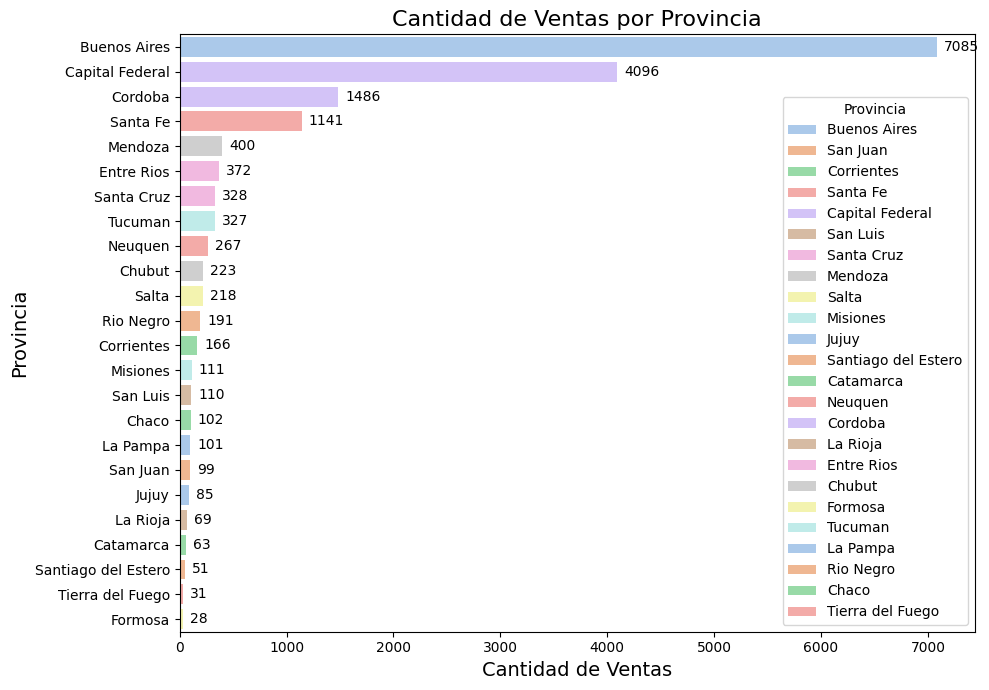

In [171]:
cantidad_ventas = df['Provincia'].value_counts().sort_values(ascending=True)
orden = df['Provincia'].value_counts().index

plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df, y='Provincia', order=orden,hue='Provincia' ,palette='pastel')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5)
plt.title('Cantidad de Ventas por Provincia', fontsize=16)
plt.xlabel('Cantidad de Ventas', fontsize=14)
plt.ylabel('Provincia', fontsize=14)
plt.tight_layout()
plt.show()
#No entiendo el error el hue

Importe vendido por cada Rubro

#Importe vendido por cada Rubro

<ipython-input-174-087f317482a5>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, rubro_importe[i] + 0.1, f"${rubro_importe[i]:,.0f}", ha='center')


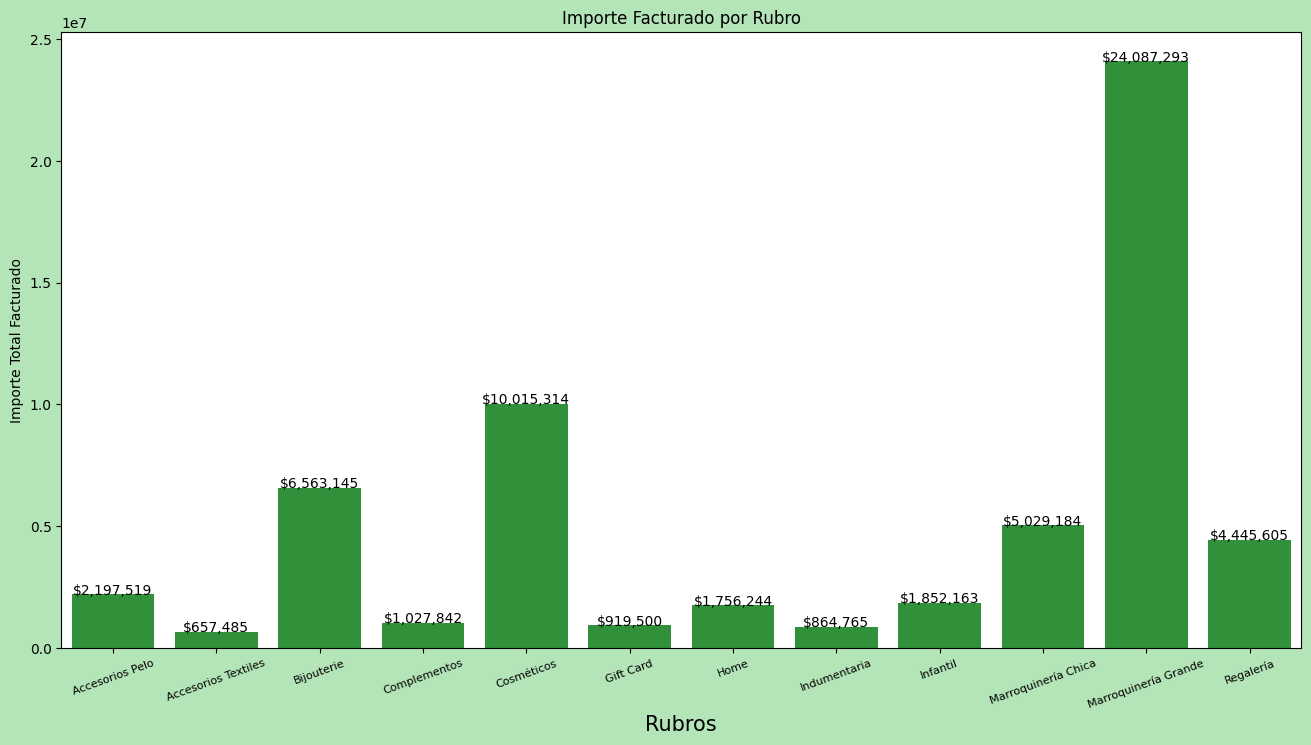

In [174]:
#df['Importe Facturado'] = df['Importe Facturado'].str.replace(';', '.')
#df['Importe Facturado'] = df['Importe Facturado'].astype(float)
rubro_importe = df.groupby('Rubro')['Importe Facturado'].sum().round(0)
plt.figure(figsize=(16, 8),facecolor='#B4E5B8')
rubro_importe.plot(kind='bar')
x_pos = range(len(rubro_importe))
plt.bar(x_pos, rubro_importe, color='#30913A')
for i in x_pos:
    plt.text(i, rubro_importe[i] + 0.1, f"${rubro_importe[i]:,.0f}", ha='center')
plt.title('Importe Facturado por Rubro')
plt.xlabel('Rubros',fontsize=15)
plt.ylabel('Importe Total Facturado',fontsize = 10)
plt.xticks(rotation=20,fontsize=8)
plt.show()

#mas cantidad de ordenes por dia

In [111]:
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'])
ordenes_por_dia = df.groupby(df['Fecha de Compra'].dt.day).size()
dia_max = ordenes_por_dia.idxmax()
dia_min = ordenes_por_dia.idxmin()
valor_max = ordenes_por_dia.max()
valor_min = ordenes_por_dia.min()

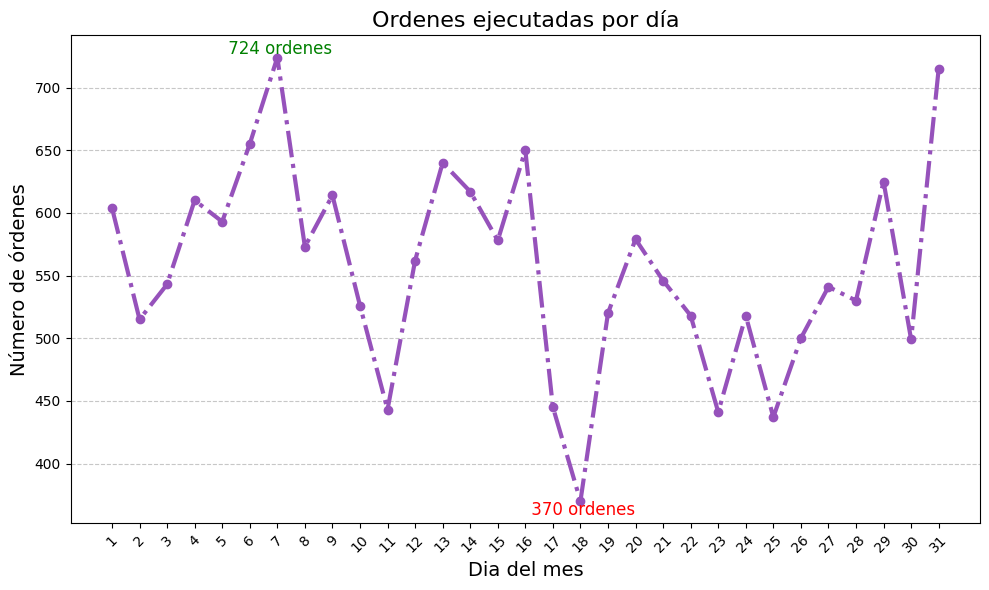

In [176]:
plt.figure(figsize=(10, 6))
plt.plot(ordenes_por_dia.index, ordenes_por_dia.values, marker='o', color='#9652BB', linestyle='-.', linewidth=3)
plt.text(dia_max, valor_max, f' {valor_max} ordenes', color='green', fontsize=12, ha='center', va='bottom')
plt.text(dia_min, valor_min, f' {valor_min} ordenes', color='red', fontsize=12, ha='center', va='top')
# Configurar el gráfico
plt.title('Ordenes ejecutadas por día', fontsize=16)
plt.xlabel('Dia del mes', fontsize=14)
plt.ylabel('Número de órdenes', fontsize=14)
plt.xticks(range(1, 32), rotation=45)  # Ajustar los ticks para los días del mes
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#Metodo de envio de las ordenes

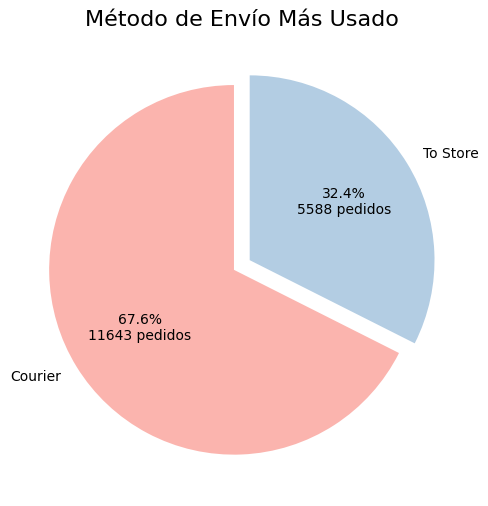

In [177]:
metodo_counts = df['Método Envío'].value_counts()
labels = metodo_counts.index
sizes = metodo_counts.values
colors = plt.cm.Pastel1(range(len(labels)))
explode = [0.05] * len(labels)
def autopct_func(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n{absolute} pedidos"
plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: autopct_func(pct, sizes),
    startangle=90,
    explode=explode,
    colors=colors
)
plt.title("Método de Envío Más Usado", fontsize=16)
plt.show()

#cantidad pedida y costo del producto  (No la pude resolver a tiempo)

In [159]:
costo=df['Costo Moneda Local']
cantidades=df['Cantidad Pedida']

,Cantidad Pedida
0,1
1,1
2,1
3,1
4,1
...,...
17226,1
17227,1
17228,1
17229,1


TypeError: scatterplot() takes from 0 to 1 positional arguments but 3 were given

<Figure size 1200x600 with 0 Axes>

#Estado de las ordenes

<ipython-input-189-a2ed63f11931>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


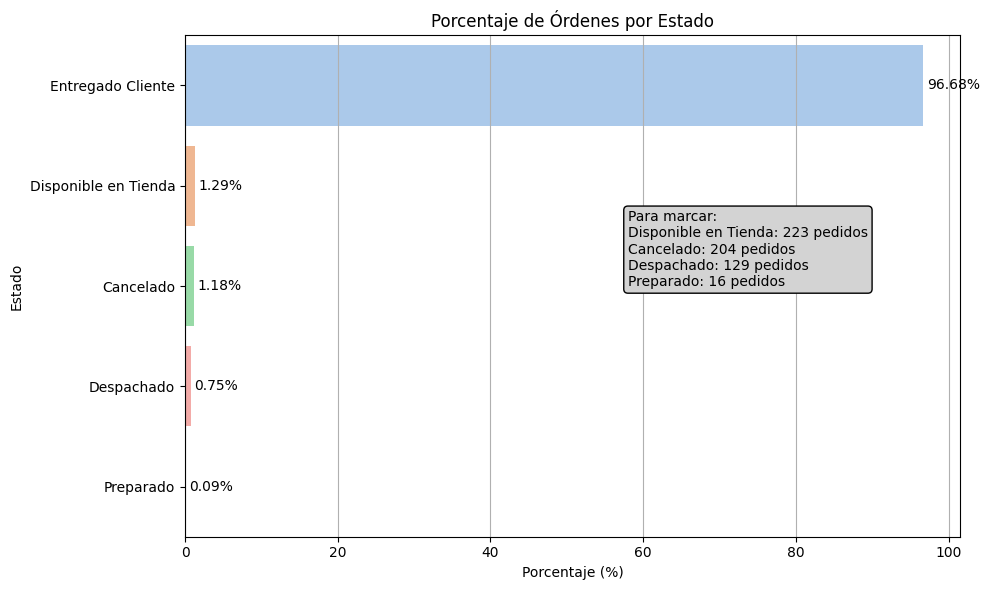

In [189]:
plt.figure(figsize=(10, 6))

estado_proporciones = df['Estado'].value_counts(normalize=True) * 100
estado_conteos = df['Estado'].value_counts()

filtro = estado_conteos.index != "Entregado Cliente"
otros_estados = estado_conteos[filtro]

ax = sns.barplot(
    x=estado_proporciones.values,
    y=estado_proporciones.index,
    palette='pastel'
)

for i, value in enumerate(estado_proporciones.values):
    ax.text(
        value + 0.5,
        i,
        f'{value:.2f}%',
        va='center',
        fontsize=10
    )

info_texto = "\n".join(
    [f"{estado}: {cantidad} pedidos" for estado, cantidad in otros_estados.items()]
)

plt.text(
    x=max(estado_proporciones.values) * 0.6,
    y=2,
    s=f"Para marcar:\n{info_texto}",
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="lightgrey", edgecolor="black")
)

plt.title('Porcentaje de Órdenes por Estado')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Estado')
plt.grid(axis='x')
plt.tight_layout()
plt.show()
